<a href="https://colab.research.google.com/github/hnidey13/tesis_SVD_t-SVDM/blob/main/SVD_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpiamos área de trabajo

In [3]:
rm(list=ls())

Leemos imagen y graficamos

In [4]:
if (!require("imager")) install.packages("imager")

Loading required package: imager

Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




 'cimg' num [1:1125, 1:633, 1, 1:3] 0.38 0.38 0.38 0.38 0.38 ...


[1] 1125  633    1    3

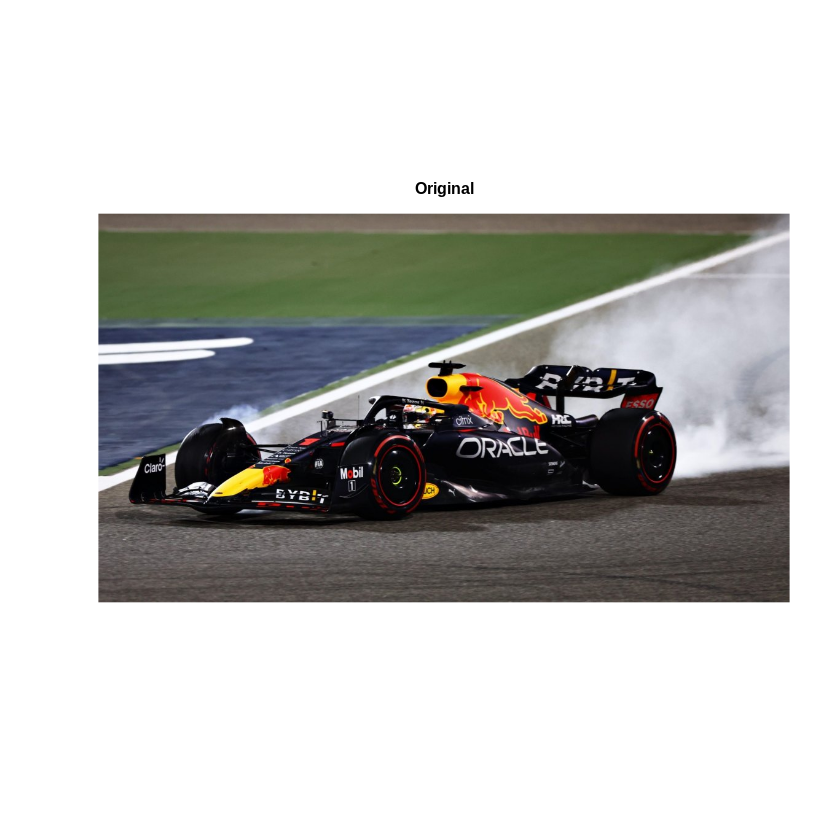

In [5]:
library(imager)
image <- load.image("F1.jpg") #Cargar imagen previamente de "tesis_SVD_t-SVDM/datos"
str(image)
(dim <- dim(image))
plot(image, axes = FALSE)
title("Original", line = -4, cex.main = .8)

###SVD con matriz de 3 columnas (canales)

Convertimos a matriz

In [6]:
image_mat <- apply(image,4,c)
str(image_mat)

 num [1:712125, 1:3] 0.38 0.38 0.38 0.38 0.38 ...


Verificamos que es posible graficar de la matriz

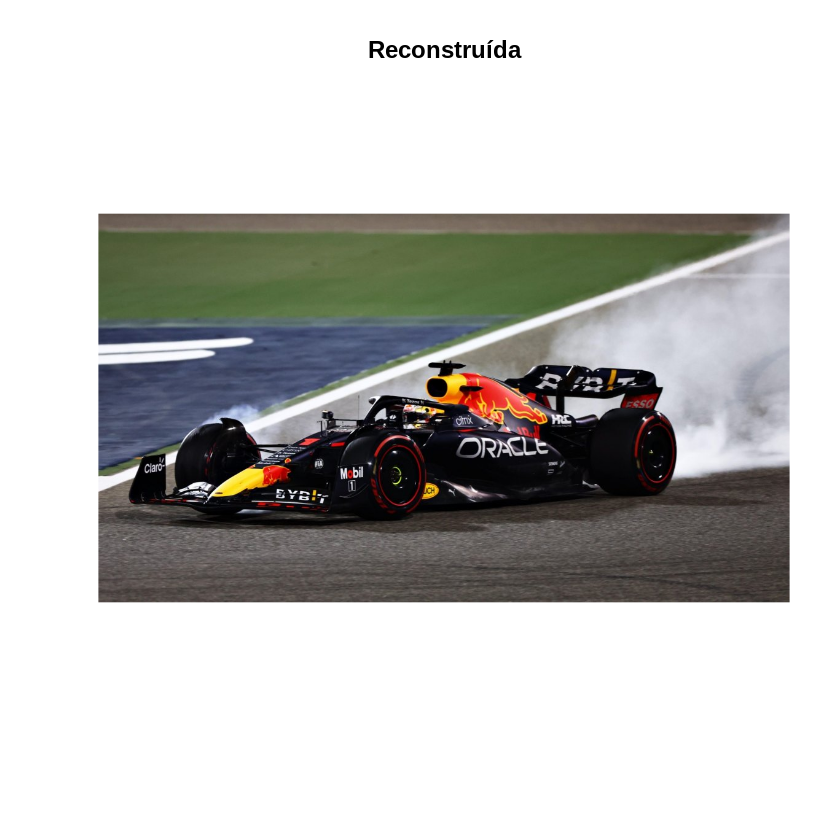

In [7]:
image2 <- array(image_mat,dim)
plot(as.cimg(image2), axes = FALSE, main = "Reconstruída")

SVD

In [8]:
library(Matrix)
thinSVD <- svd(image_mat)

Sumas parciales hasta $k$

[1] 3
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 1.581235e-10

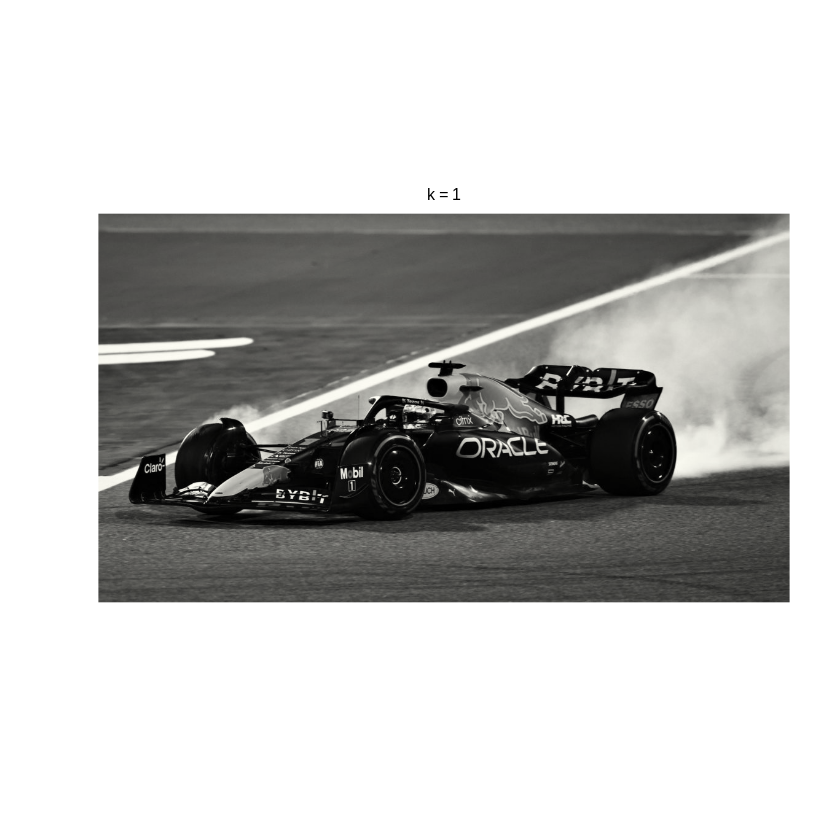

In [9]:
rankMatrix(image_mat)
k <- 1
MatRan1 <- function(i) (thinSVD$d[i] * thinSVD$u[,i] %*% t(thinSVD$v[,i]))
listMatRan1 <- lapply(1:k, MatRan1)
imageRank <- Reduce("+", listMatRan1)
main <- bquote(k==.(k))
plot(as.cimg(array(imageRank,dim)), axes = FALSE)
title(main, line = -4, cex.main = .8)

###SVD 3 veces (por cada canal)

Convertimos a matriz

In [10]:
image_mat1 <- image[,,,1]
image_mat2 <- image[,,,2]
image_mat3 <- image[,,,3]
str(image_mat1)

 num [1:1125, 1:633] 0.38 0.38 0.38 0.38 0.38 ...


Verificamos que es posible graficar de las matrices

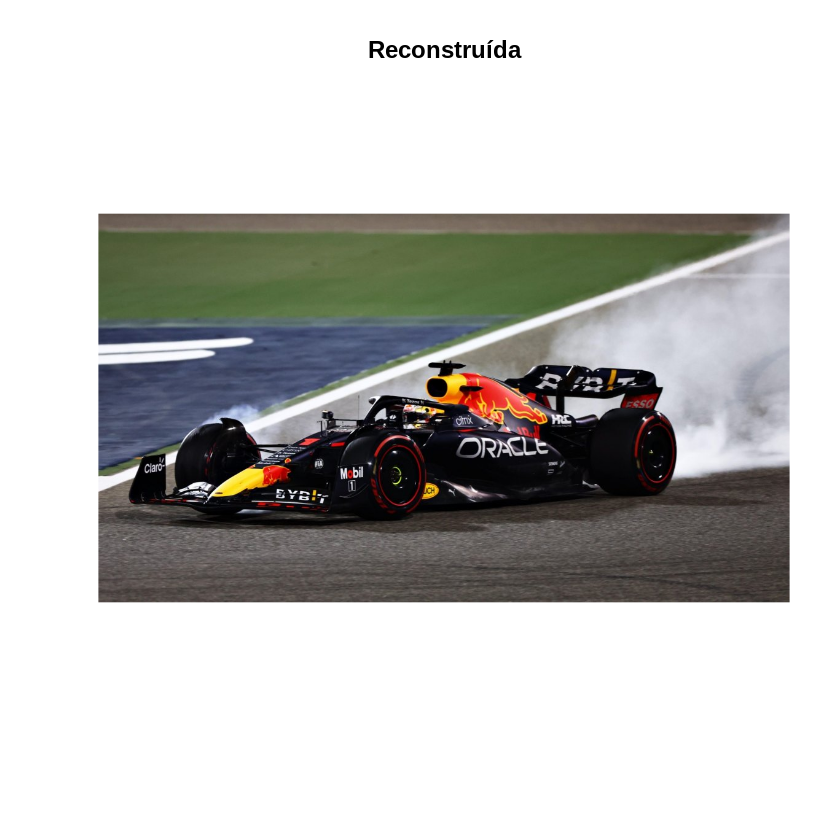

In [11]:
image2 <- array(c(image_mat1,image_mat2,image_mat3),dim)
plot(as.cimg(image2), axes = FALSE, main = "Reconstruída")

SVD

In [12]:
library(Matrix)
thinSVD1 <- svd(image_mat1)
thinSVD2 <- svd(image_mat2)
thinSVD3 <- svd(image_mat3)

Sumas parciales hasta $k_1$ (image_mat1)

In [13]:
rankMatrix(image_mat1)
k1 <- 10
MatRan1_1 <- function(i) (thinSVD1$d[i] * thinSVD1$u[,i] %*% t(thinSVD1$v[,i]))
listMatRan1_1 <- lapply(1:k1, MatRan1_1)
imageRank_1 <- Reduce("+", listMatRan1_1)

[1] 633
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 2.498002e-13

Sumas parciales hasta $k_2$ (image_mat2)

In [14]:
rankMatrix(image_mat2)
k2 <- 1
MatRan1_2 <- function(i) (thinSVD2$d[i] * thinSVD2$u[,i] %*% t(thinSVD2$v[,i]))
listMatRan1_2 <- lapply(1:k2, MatRan1_2)
imageRank_2 <- Reduce("+", listMatRan1_2)

[1] 633
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 2.498002e-13

Sumas parciales hasta $k_3$ (image_mat3)

In [15]:
rankMatrix(image_mat3)
k3 <- 1
MatRan1_3 <- function(i) (thinSVD3$d[i] * thinSVD3$u[,i] %*% t(thinSVD3$v[,i]))
listMatRan1_3 <- lapply(1:k3, MatRan1_3)
imageRank_3 <- Reduce("+", listMatRan1_3)

[1] 633
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 2.498002e-13

Graficamos

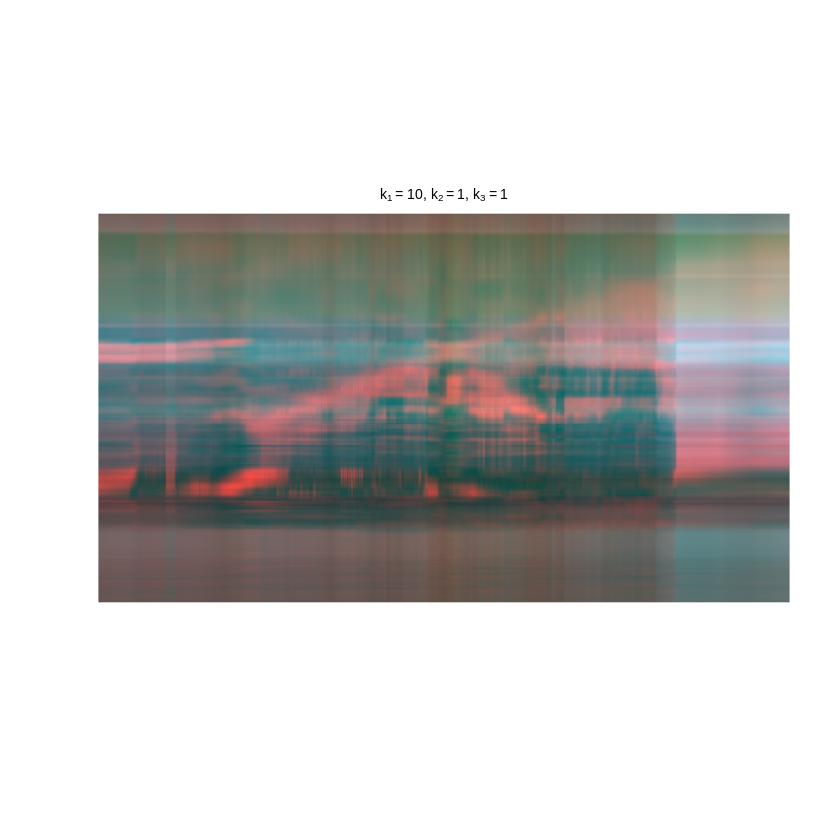

In [16]:
image2 <- array(c(imageRank_1,imageRank_2,imageRank_3),dim)
main <- bquote(paste(k[1]==.(k1),", ",k[2]==.(k2),", ",k[3]==.(k3)))
plot(as.cimg(image2), axes = FALSE)
title(main, line = -4, cex.main = .7)

###SVD una sola matriz cbind

Convertimos a matriz

In [17]:
image_mat <- cbind(image[,,,1],image[,,,2],image[,,,3])
str(image_mat)

 num [1:1125, 1:1899] 0.38 0.38 0.38 0.38 0.38 ...


Verificamos que es posible graficar de la matriz

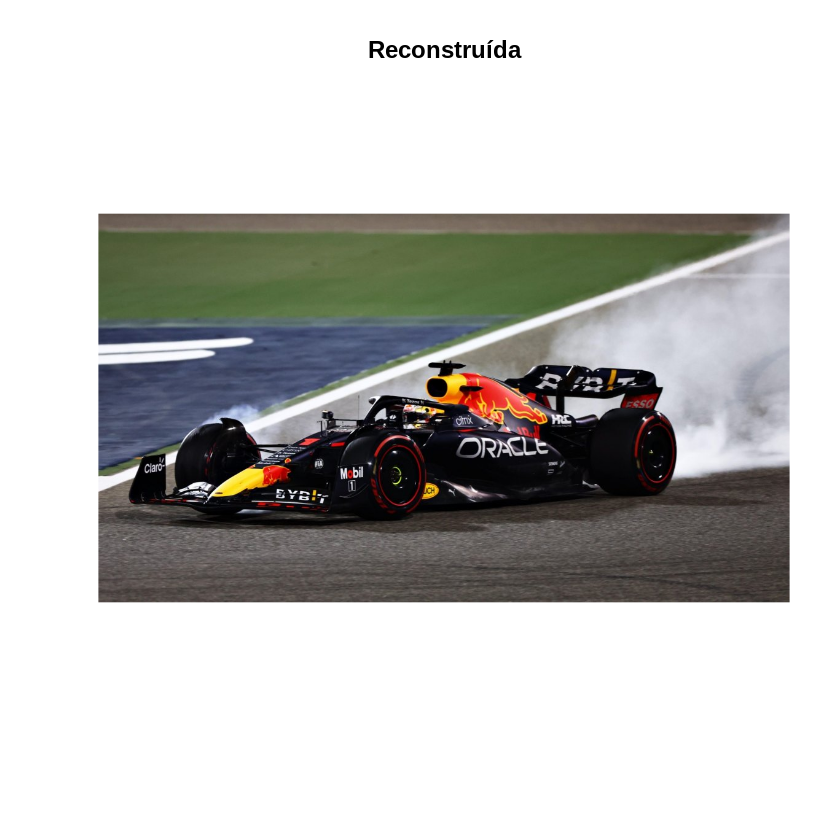

In [18]:
image2 <- array(image_mat,dim)
plot(as.cimg(image2), axes = FALSE, main = "Reconstruída")

SVD

In [19]:
library(Matrix)
thinSVD <- svd(image_mat)

Sumas parciales hasta $k$

[1] 1125
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 4.216627e-13

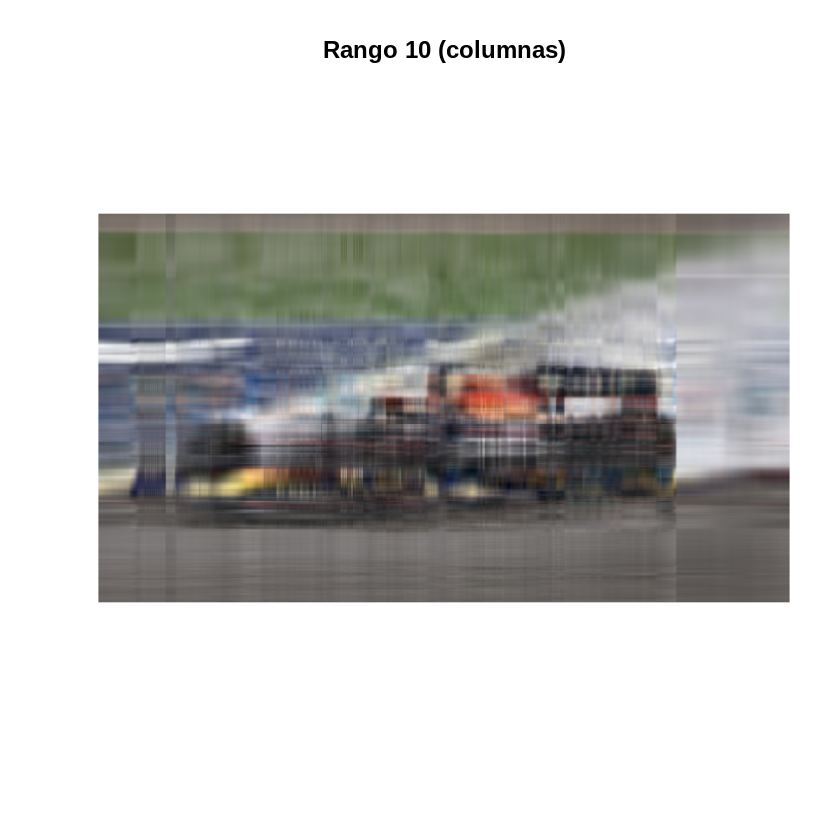

In [20]:
rankMatrix(image_mat)
k <- 10
MatRan1 <- function(i) (thinSVD$d[i] * thinSVD$u[,i] %*% t(thinSVD$v[,i]))
listMatRan1 <- lapply(1:k, MatRan1)
imageRank <- Reduce("+", listMatRan1)
plot(as.cimg(array(imageRank,dim)), axes = FALSE,
     main = paste0("Rango ",k," (columnas)"))

###SVD una sola matriz rbind

Convertimos a matriz

In [21]:
image_mat <- rbind(image[,,,1],image[,,,2],image[,,,3])
str(image_mat)

 num [1:3375, 1:633] 0.38 0.38 0.38 0.38 0.38 ...


Verificamos que es posible graficar de la matriz

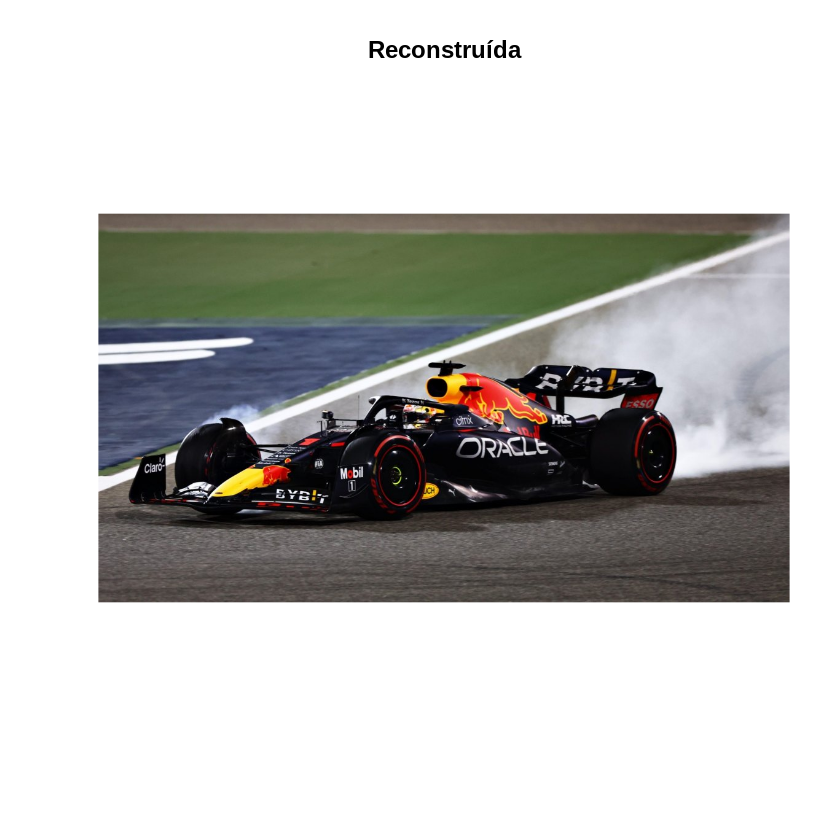

In [22]:
image2 <- aperm(array(t(image_mat),c(dim[2],dim[1],1,3)),c(2,1,3,4))
plot(as.cimg(image2), axes = FALSE, main = "Reconstruída")

SVD

In [23]:
library(Matrix)
thinSVD <- svd(image_mat)

Sumas parciales hasta $k$

In [24]:
rankMatrix(image_mat)
k <- 10
MatRan1 <- function(i) (thinSVD$d[i] * thinSVD$u[,i] %*% t(thinSVD$v[,i]))
listMatRan1 <- lapply(1:k, MatRan1)
imageRank <- Reduce("+", listMatRan1)

[1] 633
attr(,"method")
[1] "tolNorm2"
attr(,"useGrad")
[1] FALSE
attr(,"tol")
[1] 7.494005e-13

Graficamos

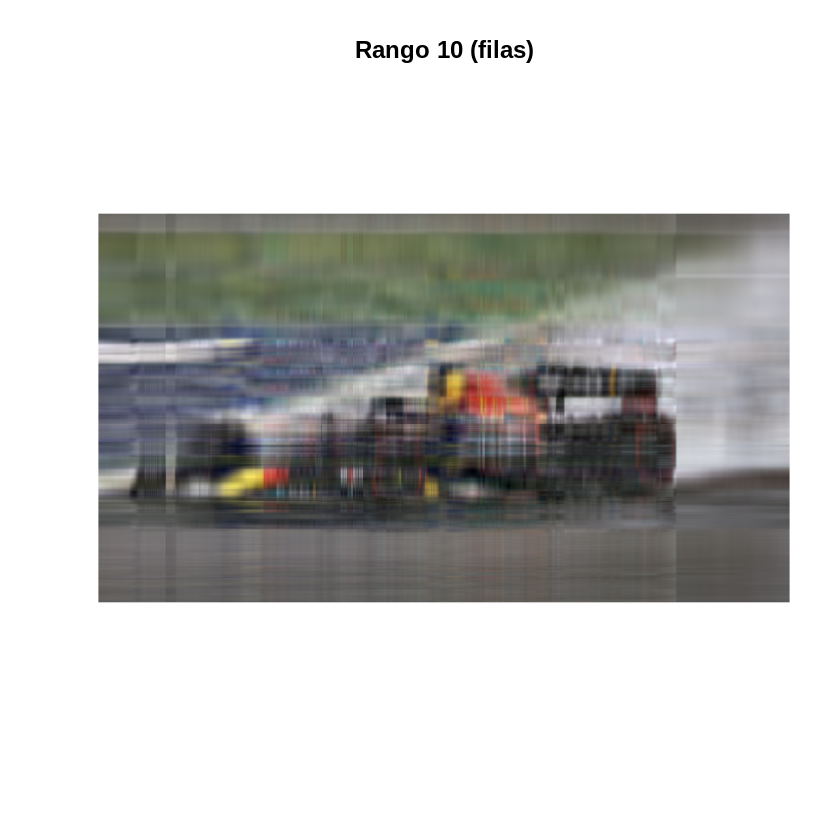

In [25]:
image2 <- aperm(array(t(imageRank),c(dim[2],dim[1],1,3)),c(2,1,3,4))
plot(as.cimg(image2), axes = FALSE,
     main = paste0("Rango ",k," (filas)"))